In [5]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt

model = VGG16(weights='imagenet', include_top=False)

In [6]:
image_path = "/Applications/DermaML/5A7E3A5F-334A-4C8D-9E0D-BD435389C81E.jpeg"
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [7]:
layer_names = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']
outputs = [model.get_layer(layer_name).output for layer_name in layer_names]

# Create a new model that extracts feature maps from intermediate layers
activation_model = tf.keras.models.Model(inputs=model.input, outputs=outputs)

In [8]:
feature_maps = activation_model.predict(x)

1/1 [==============================] - 0s 125ms/step


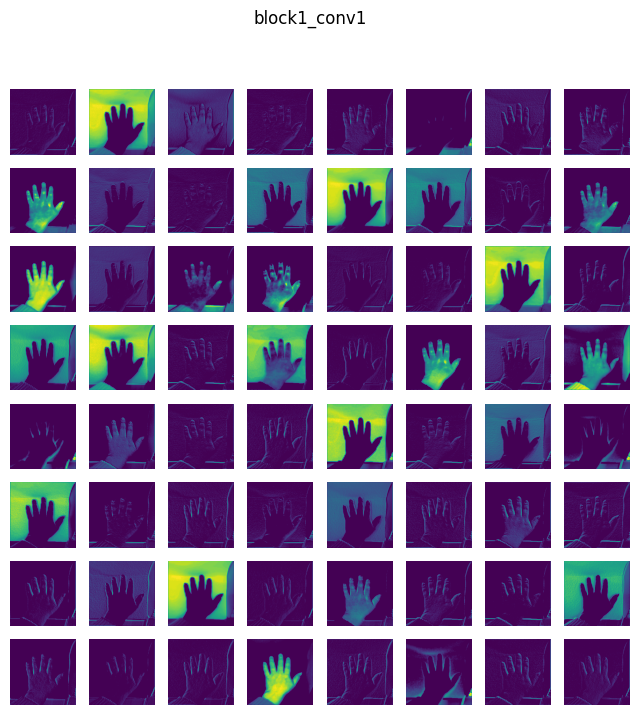

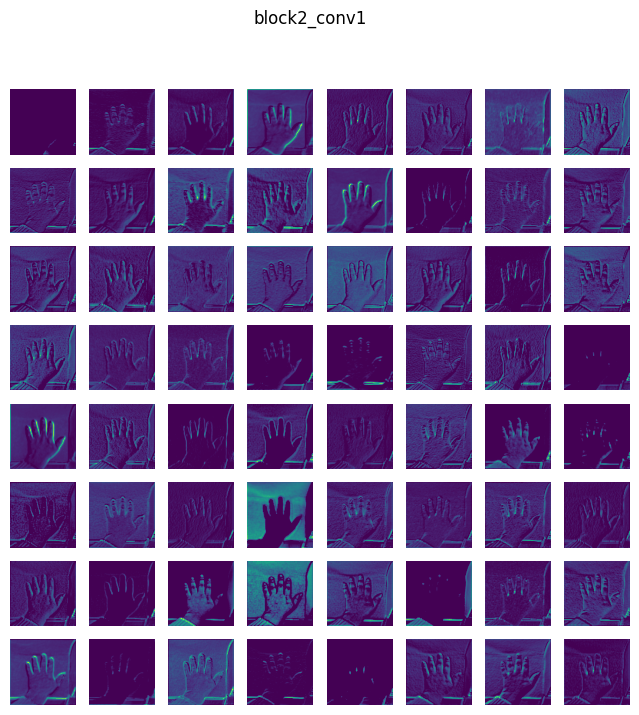

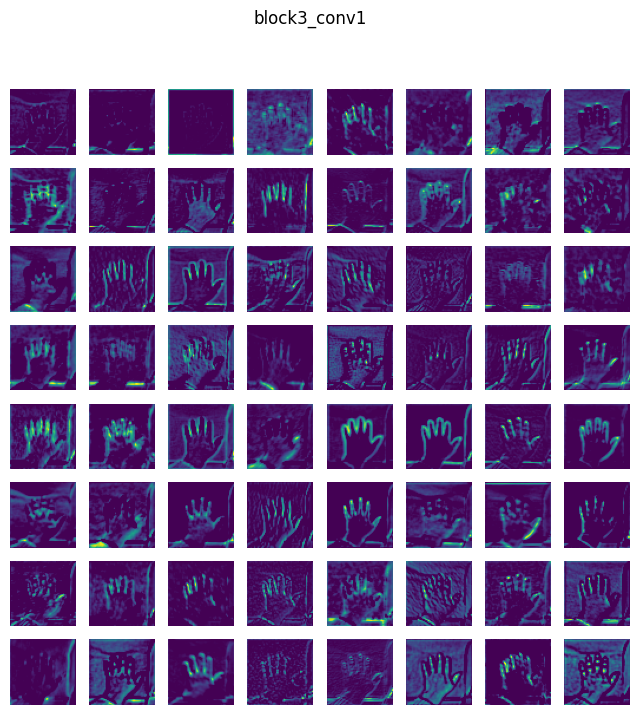

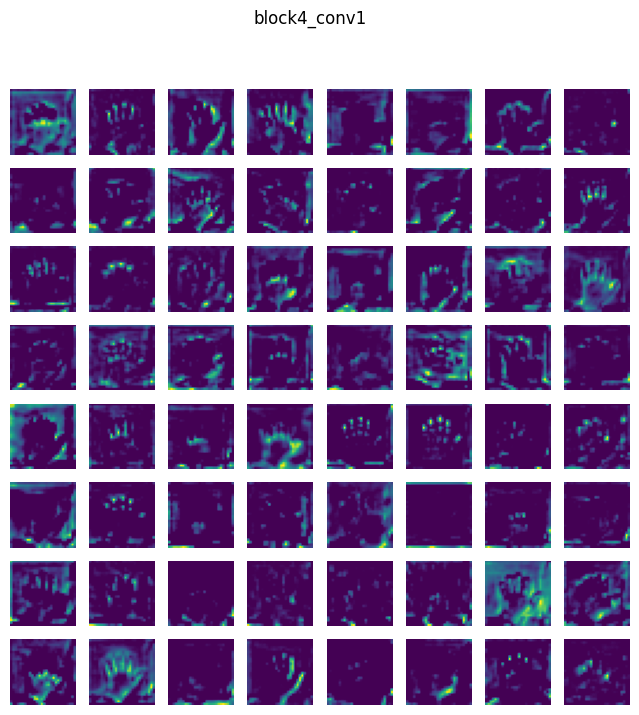

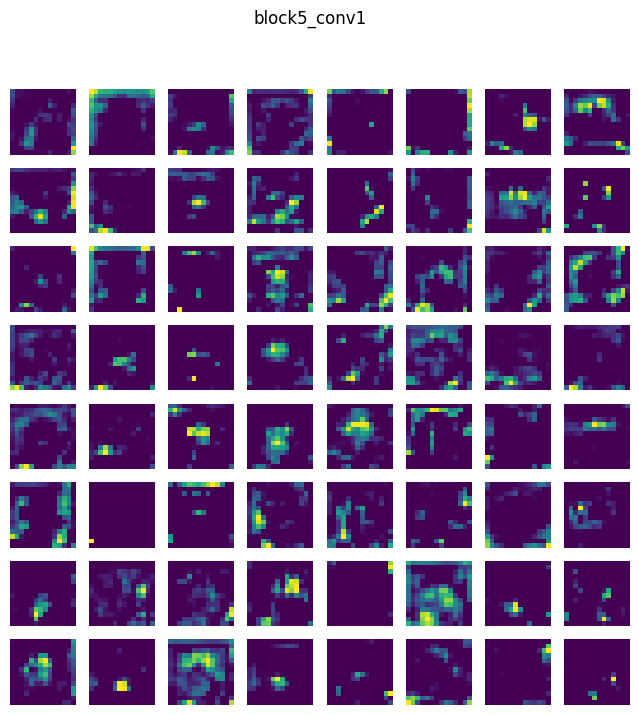

In [10]:
for layer_name, feature_map in zip(layer_names, feature_maps):
    num_features = min(feature_map.shape[-1], 64)
    plt.figure(figsize=(8, 8))
    for i in range(num_features):
        plt.subplot(8, 8, i+1)
        plt.imshow(feature_map[0, :, :, i], cmap='viridis')
        plt.axis('off')
    plt.suptitle(layer_name)
    plt.show()

In [19]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input as vgg_preprocess_input
from sklearn.manifold import TSNE

# Load the VGG16 model with pre-trained weights
model = VGG16(include_top=False, weights='imagenet')
# Alternatively, you can use ResNet50
# model = ResNet50(include_top=False, weights='imagenet')

# Load and preprocess the input image
image_path = "/Applications/DermaML/5A7E3A5F-334A-4C8D-9E0D-BD435389C81E.jpeg"
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = vgg_preprocess_input(x)  # or resnet_preprocess_input(x) for ResNet50

In [20]:
features = model.predict(x)
feature_vector = features.reshape((features.shape[0], -1))

1/1 [==============================] - 0s 131ms/step


In [26]:
tsne = TSNE(n_components=2, perplexity=0, random_state=42)
reduced_features = tsne.fit_transform(feature_vector)

ValueError: Found array with 1 sample(s) (shape=(1, 25088)) while a minimum of 2 is required by TSNE.

In [27]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c='b', marker='o', label='Image')
plt.legend()
plt.title('t-SNE Visualization of Feature Vectors')
plt.show()

NameError: name 'reduced_features' is not defined